In [123]:
import tensorflow as tf
print(tf.__version__)

2.4.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [125]:
# Build the Sequential feedforward neural network model
model = Sequential([
        Flatten(input_shape=(28, 28), name='input'),
        Dense(16, activation='relu', name='layer_1'),
        Dense(16, activation='relu', name='layer_2'),
        Dense(10, activation='softmax', name='softmax')
])


In [126]:
# Print the model summary
model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
softmax (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [130]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='SAME', input_shape=(28, 28, 1)), 
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [131]:
# Print the model summary
model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1296)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [132]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.CategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [133]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [134]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [135]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [136]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [137]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [138]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0


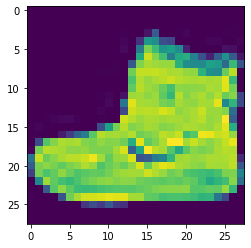

label: Ankle boot


In [139]:
# Display one of the images
i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [140]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=2, batch_size=256)


Epoch 1/2
235/235 [==============================] - 15s 61ms/step - loss: 1.2018 - accuracy: 0.6127
Epoch 2/2
235/235 [==============================] - 14s 61ms/step - loss: 0.4997 - accuracy: 0.8256


#### Plot training history

In [141]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.819681,0.727817
1,0.478653,0.833500


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

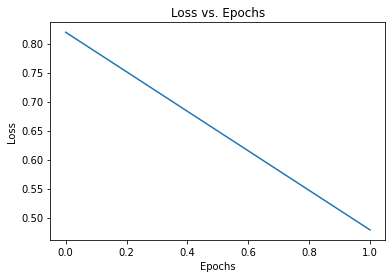

In [142]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

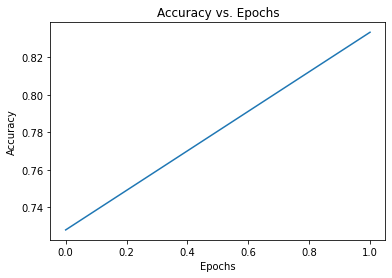

In [145]:
# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy", title='Accuracy vs. Epochs', legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")


In [101]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [146]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [148]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)


313/313 - 2s - loss: 0.4613 - accuracy: 0.8361


#### Make predictions from the model

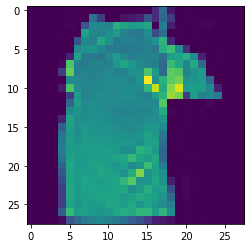

Label: Shirt


In [149]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [150]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction:{labels[np.argmax(predictions)]}")

Model prediction:Shirt
